In [1]:
import numpy as np 
import pandas as pd

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [43]:
v_t = np.random.normal(loc=0.0, scale=1.0, size=None)


In [44]:
white_noise = []

In [45]:
for i in range(300):
    v_t = np.random.normal(loc=0.0, scale=1.0, size=None)
    white_noise.append(v_t)


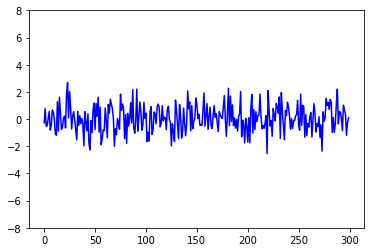

In [47]:
plt.plot(white_noise,'blue')
plt.ylim((-8,8))
plt.show()

In [52]:
# ar1 
x=[0]
for i in range(300):
    x_t_1 = 0.7*x[i]+white_noise[i]
    x.append(x_t_1)

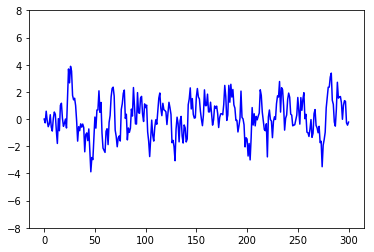

In [53]:
plt.plot(x,'blue')
plt.ylim((-8,8))
plt.show()

In [82]:
#garch error
epsilon = [0]
for i in range(300):
    a =  math.sqrt(1+0.8*(epsilon[i]**2))
    epsilon_t = white_noise[i]*a
    epsilon.append(epsilon_t)
epsilon

[0,
 -0.277525806916471,
 0.7967328367278352,
 -0.6484327675374245,
 -0.5474254503023038,
 0.03773131066100059,
 0.5711169417624544,
 -0.9135996449720034,
 -0.6053625068933491,
 0.749625931043706,
 0.588072666127914,
 -0.01354538571082866,
 -1.1055181932728482,
 -1.6746837674780375,
 2.317691970610006,
 -2.0262939855410274,
 3.3289938084714907,
 1.4449409618471911,
 -1.2311311003585275,
 -0.8593636229858598,
 0.0885737999592875,
 0.21644424798040804,
 -0.6698881660206536,
 2.1895043622178907,
 5.923452745809651,
 0.45270631350890994,
 2.1767342285766,
 1.778928202027727,
 -1.3746082059678943,
 0.31629101869322607,
 0.5622920162698046,
 -0.0845101623446495,
 -0.8302379371573869,
 -1.9067698587334287,
 1.1253134953227484,
 -0.6487200652797238,
 0.28438054221403875,
 -0.35914548935734497,
 0.052391178562838286,
 -0.37191423483106056,
 -2.074649552187235,
 1.152071937729419,
 -0.31583437697682126,
 -0.9082227016192962,
 0.49646556082318144,
 -1.9662071755835928,
 -4.5833908889040496,
 -0.4

In [86]:
#取前三百個
eps = epsilon[0:300]

In [89]:
#ar1 fit arch1
x=[0]
for i in range(300):
    x_t_1 = 0.9*x[i]+eps[i]
    x.append(x_t_1)

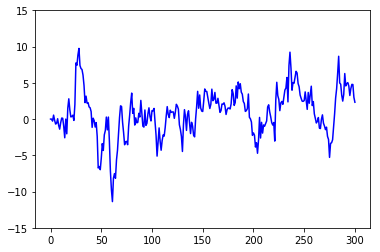

In [93]:
plt.plot(x,'blue')
plt.ylim((-15,15))
plt.show()

In [101]:
trend=[]
for i in range(300):
    t_trend = i
    trend.append(t_trend)
trend = np.array(trend)

In [110]:
len(trend)

300

In [143]:
#ar1 + arch1 + trend
x=[0]
for i in range(300):
    x_t_1 = 0.9*x[i]+eps[i]+0.02*trend[i]
    x.append(x_t_1)

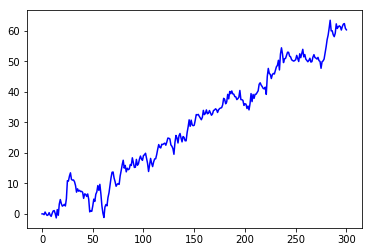

In [144]:
plt.plot(x,'blue')
#plt.ylim((-10,80))
plt.show()

In [149]:
# arima 資料長度為先改為500筆，前20比捕0，最後再取最後300筆感覺比較好

#step1 先製造出eplison
x=[]
for i in range(20):
    x.append(0)
for i in range(480):
    x.append(np.random.normal(loc=0.0, scale=1.0, size=None))


## epls = v_t*sqrt(h_t)

In [172]:
# a_{0}=0.3,epls_{t-1}=0,h_{t-1}=0
epls= [0]###garch(1,1會有兩個起始點)
h_t = [0]

a_0 = 0.3
a_1 = 0.2
b_1 = 0.3
for i in range(2):
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i]
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [173]:
epls

[0, 0.25085388323064484, -0.2839113705836091]

In [174]:
h_t

[0, 0.3, 0.40258553414637877]

In [189]:
#arima(1,1) fit Garch(1,1)
ma_lag1=0.225
ar_lag1=0.8
m=[0]
for i in range(1,300):
    x_t_1 =0.2+ ar_lag1*x[i-1] + eps[i] + ma_lag1*eps[i-1]+0.02*trend[i]
    m.append(x_t_1)

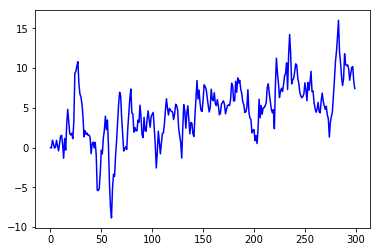

In [190]:
plt.plot(m,'blue')
#plt.ylim((-10,80))
plt.show()

In [187]:
eps[1]+0.2

-0.07752580691647099